### 导入库

In [1]:
import torch
from torch.utils import data
import torchvision
from torchvision import transforms
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

from data import LoadData
from model import VGG16
from utils import *
from loss import EdgeHoldLoss

for name in (torch, torchvision, cv2, np):
    print(name.__version__)

1.6.0+cu101
0.7.0+cu101
4.3.0
1.19.1


### 使用GPU或者CPU

In [2]:
if torch.cuda.is_available():
    device = torch.device(device='cuda')
else:
    device = torch.device(device='cpu')
device

device(type='cuda')

In [3]:
path_image = "./DUTS/DUTS-TR/DUTS-TR-Image/"
path_mask = "./DUTS/DUTS-TR/DUTS-TR-Mask/"

In [4]:
batch_size = 3 
learning_rate = 1e-14
target_size = 256
epochs = 5

In [5]:
data_loader = data.DataLoader(LoadData(path_image, path_mask, target_size),
                            batch_size=batch_size,
                            shuffle=True)

In [6]:
total_batch = len(data_loader)
total_batch

3518

### 导入模型

In [7]:
model = VGG16()

In [8]:
model.load_state_dict(torch.load("./model/model_65_edge.pth"), strict=False)

<All keys matched successfully>

In [9]:
model.eval()
model.to(device)
criterion = EdgeHoldLoss().to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
for epoch in range(epochs):
    start_time = time.time()
    model.train()
    
    total_loss = 0
    total_acc = 0
    total_pre = 0
    total_rec = 0
    total_f_score = 0
    
    for batch_n, (image, mask) in enumerate(data_loader, start=1):
        
        image = image.to(device)
        mask = mask.to(device)
        
        optimizer.zero_grad()
        predict = model(image)
        loss = criterion(predict, mask)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            total_loss += loss.item()
            acc = accuracy(predict, mask)
            total_acc += acc

            pre = precision(predict, mask)
            total_pre += pre

            rec = recall(predict, mask)
            total_rec += rec

            f_score = F_Measure(pre, rec)
            total_f_score += f_score
        
        
        if batch_n % 100 == 0:
            with torch.no_grad():
                avg_acc = total_acc / batch_n
                avg_pre = total_pre / batch_n
                avg_rec = total_rec / batch_n
                avg_f_score = total_f_score / batch_n
                print("Epoch:{} loss:{} Batch:{}/{}"
                      .format(epoch + 1, loss.item(), batch_n, total_batch), end="")
                print(" acc:{} pre:{} recall:{} F-measure:{}"
                      .format(avg_acc, avg_pre, avg_rec, avg_f_score))
    end_time = time.time()
    print("--------------------------------------------------------------")
    print("Epoch {} time:{:.2f}s END :loss:{} acc:{} pre:{} rec:{} F-measure:{}"
          .format(epoch + 1, 
                  end_time - start_time,
                  total_loss / total_batch, 
                  total_acc / total_batch,
                  total_pre / total_batch,
                  total_rec / total_batch,
                  total_f_score / total_batch))
    print("--------------------------------------------------------------")

Epoch:1 loss:0.3839060366153717 Batch:100/3518 acc:0.9264829158782959 pre:0.9339013695716858 recall:0.8997520208358765 F-measure:0.9236041903495789
Epoch:1 loss:0.3963319659233093 Batch:200/3518 acc:0.9274551868438721 pre:0.9374418258666992 recall:0.9074040651321411 F-measure:0.9283673167228699
Epoch:1 loss:0.3791317939758301 Batch:300/3518 acc:0.9251434803009033 pre:0.9372038245201111 recall:0.9009639620780945 F-measure:0.9266655445098877
Epoch:1 loss:0.3934049606323242 Batch:400/3518 acc:0.9246923327445984 pre:0.9359775185585022 recall:0.8964221477508545 F-measure:0.9243702292442322
Epoch:1 loss:0.3718818426132202 Batch:500/3518 acc:0.9243631362915039 pre:0.9363957643508911 recall:0.8967102766036987 F-measure:0.9246811270713806
Epoch:1 loss:0.38198092579841614 Batch:600/3518 acc:0.9240226745605469 pre:0.9372336268424988 recall:0.8958545923233032 F-measure:0.9251396656036377
Epoch:1 loss:0.3797760605812073 Batch:700/3518 acc:0.9245167374610901 pre:0.9368112683296204 recall:0.896319687

Epoch:2 loss:0.38403135538101196 Batch:2000/3518 acc:0.9241486191749573 pre:0.9375551342964172 recall:0.8959808349609375 F-measure:0.9254941940307617
Epoch:2 loss:0.3779953420162201 Batch:2100/3518 acc:0.9240272641181946 pre:0.9373277425765991 recall:0.8958742618560791 F-measure:0.9252808094024658
Epoch:2 loss:0.37080228328704834 Batch:2200/3518 acc:0.9241341352462769 pre:0.9367343187332153 recall:0.8960558772087097 F-measure:0.9248690605163574
Epoch:2 loss:0.36875373125076294 Batch:2300/3518 acc:0.9242132306098938 pre:0.9368406534194946 recall:0.8959665894508362 F-measure:0.9249302744865417
Epoch:2 loss:0.3859286606311798 Batch:2400/3518 acc:0.9242972135543823 pre:0.9368427991867065 recall:0.8957293033599854 F-measure:0.9248654246330261
Epoch:2 loss:0.38931047916412354 Batch:2500/3518 acc:0.9242003560066223 pre:0.9362773895263672 recall:0.8953590393066406 F-measure:0.9242960810661316
Epoch:2 loss:0.38543590903282166 Batch:2600/3518 acc:0.9241146445274353 pre:0.9359753131866455 recall:

Epoch:4 loss:0.38176465034484863 Batch:200/3518 acc:0.9230774641036987 pre:0.9371572732925415 recall:0.8893440961837769 F-measure:0.9235034584999084
Epoch:4 loss:0.3764163851737976 Batch:300/3518 acc:0.923420250415802 pre:0.9368894696235657 recall:0.8891183733940125 F-measure:0.9231976270675659
Epoch:4 loss:0.3691710829734802 Batch:400/3518 acc:0.9234275817871094 pre:0.9368646740913391 recall:0.8870938420295715 F-measure:0.9223268628120422
Epoch:4 loss:0.3924487829208374 Batch:500/3518 acc:0.9239488244056702 pre:0.9372386336326599 recall:0.8905102610588074 F-measure:0.9236401319503784
Epoch:4 loss:0.3632318377494812 Batch:600/3518 acc:0.9235503077507019 pre:0.9375308752059937 recall:0.8883966207504272 F-measure:0.923101544380188
Epoch:4 loss:0.3822603225708008 Batch:700/3518 acc:0.9239146113395691 pre:0.9361560940742493 recall:0.8905495405197144 F-measure:0.9226600527763367
Epoch:4 loss:0.38797682523727417 Batch:800/3518 acc:0.9240548014640808 pre:0.9354327321052551 recall:0.8910985589

Epoch:5 loss:0.3775867819786072 Batch:2100/3518 acc:0.9239910840988159 pre:0.9359564781188965 recall:0.8951438069343567 F-measure:0.9240650534629822
Epoch:5 loss:0.38631942868232727 Batch:2200/3518 acc:0.9239517450332642 pre:0.9364030361175537 recall:0.8957158327102661 F-measure:0.924582839012146
Epoch:5 loss:0.3814733922481537 Batch:2300/3518 acc:0.9238850474357605 pre:0.9365253448486328 recall:0.8953884243965149 F-measure:0.9246004819869995
Epoch:5 loss:0.37751924991607666 Batch:2400/3518 acc:0.9239897131919861 pre:0.9359827637672424 recall:0.8956295251846313 F-measure:0.9242748022079468
Epoch:5 loss:0.3611726760864258 Batch:2500/3518 acc:0.9239404201507568 pre:0.9360319375991821 recall:0.8955416679382324 F-measure:0.9242866039276123
Epoch:5 loss:0.3760412037372589 Batch:2600/3518 acc:0.9239951968193054 pre:0.9360910058021545 recall:0.895641028881073 F-measure:0.9243637323379517
Epoch:5 loss:0.37406009435653687 Batch:2700/3518 acc:0.9239304661750793 pre:0.9363436102867126 recall:0.89

In [11]:
torch.save(model.state_dict(),"./model/model_70_edge.pth")

In [12]:
def pad_resize_image(inp_img, out_img=None, target_size=None):
    h, w, c = inp_img.shape
    size = max(h, w)

    padding_h = (size - h) // 2
    padding_w = (size - w) // 2

    if out_img is None:
        # For inference
        temp_x = cv2.copyMakeBorder(inp_img, top=padding_h, bottom=padding_h, left=padding_w, right=padding_w,
                                    borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])
        if target_size is not None:
            temp_x = cv2.resize(temp_x, (target_size, target_size), interpolation=cv2.INTER_AREA)
        return temp_x
    else:
        # For training and testing
        temp_x = cv2.copyMakeBorder(inp_img, top=padding_h, bottom=padding_h, left=padding_w, right=padding_w,
                                    borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])
        temp_y = cv2.copyMakeBorder(out_img, top=padding_h, bottom=padding_h, left=padding_w, right=padding_w,
                                    borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])
        # print(inp_img.shape, temp_x.shape, out_img.shape, temp_y.shape)

        if target_size is not None:
            temp_x = cv2.resize(temp_x, (target_size, target_size), interpolation=cv2.INTER_AREA)
            temp_y = cv2.resize(temp_y, (target_size, target_size), interpolation=cv2.INTER_AREA)
        return temp_x, temp_y


In [13]:
def getInput(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')
    
    img = pad_resize_image(img, target_size=256)
    img /= 255.
    img = np.transpose(img, axes=(2, 0, 1))
    img = torch.from_numpy(img).float()
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]) 
    
    img = normalize(img)
    return img

In [14]:
img = getInput("./image/1.jpg")

In [15]:
img.shape

torch.Size([3, 256, 256])

In [16]:
img = img.reshape(1, 3, 256, 256)
img = img.to(device)

In [17]:
predict = model(img)

In [18]:
predict.shape

torch.Size([1, 1, 256, 256])

In [19]:
msk = predict.reshape(256, 256, 1)
msk = msk.cpu().detach()

In [20]:
msk.shape

torch.Size([256, 256, 1])

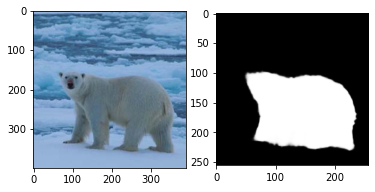

In [21]:
msk = np.array(msk, dtype=np.float32)
img = cv2.imread("./image/1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(msk, cmap='gray')
plt.show()

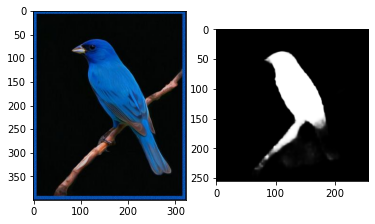

In [22]:
img = getInput("./image/2.jpg")
img = img.reshape(1, 3, 256, 256)
img = img.to(device)
predict = model(img)
msk = predict.reshape(256, 256, 1)
msk = msk.cpu().detach()

msk = np.array(msk, dtype=np.float32)
img = cv2.imread("./image/2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(msk, cmap='gray')
plt.show()

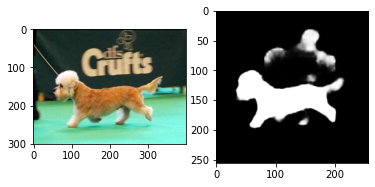

In [23]:
img = getInput("./image/3.jpg")
img = img.reshape(1, 3, 256, 256)
img = img.to(device)
predict = model(img)
msk = predict.reshape(256, 256, 1)
msk = msk.cpu().detach()

msk = np.array(msk, dtype=np.float32)
img = cv2.imread("./image/3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(msk, cmap='gray')
plt.show()

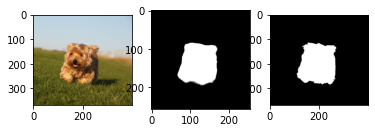

In [24]:
img = getInput("./DUTS/DUTS-TR/DUTS-TR-Image/ILSVRC2012_test_00000004.jpg")
img = img.reshape(1, 3, 256, 256)
img = img.to(device)
predict = model(img)
msk = predict.reshape(256, 256, 1)
msk = msk.cpu().detach()

msk = np.array(msk, dtype=np.float32)
img = cv2.imread("./DUTS/DUTS-TR/DUTS-TR-Image/ILSVRC2012_test_00000004.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(msk*255, cmap='gray')
plt.subplot(133)
plt.imshow(cv2.imread("./DUTS/DUTS-TR/DUTS-TR-Mask/ILSVRC2012_test_00000004.png"))
plt.show()